In [189]:
import sys
print(sys.path)

['C:\\Users\\Lenovo\\machine learning', 'D:\\Anaconda\\python38.zip', 'D:\\Anaconda\\DLLs', 'D:\\Anaconda\\lib', 'D:\\Anaconda', '', 'D:\\Anaconda\\lib\\site-packages', 'D:\\Anaconda\\lib\\site-packages\\win32', 'D:\\Anaconda\\lib\\site-packages\\win32\\lib', 'D:\\Anaconda\\lib\\site-packages\\Pythonwin', 'D:\\Anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Lenovo\\.ipython', 'C:\\users\\lenovo\\appdata\\local\\programs\\python\\python37\\lib\\site-packages']


安装xgboost包需要手动添加路径 运行前先检查路径

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from lightgbm import LGBMClassifier


In [191]:
train = pd.read_csv('D:/大三/机器学习/customer_churn_judgment/customer_churn_judgment/train.csv')
test = pd.read_csv('D:/大三/机器学习/customer_churn_judgment/customer_churn_judgment/test_noLabel.csv')
sub = pd.read_csv('D:/大三/机器学习/customer_churn_judgment/customer_churn_judgment/submit_example.csv')
sample_no_label = pd.read_csv('D:/大三/机器学习/customer_churn_judgment/customer_churn_judgment/samples_noLabel.csv')


In [192]:
train.shape,test.shape

((5227, 16), (1307, 15))

查看数据规模，训练数据集有5227条记录，15个特征1个标签。测试集数据有1037条数据，15个特征。

In [193]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5227 non-null   int64  
 1   Contract          5227 non-null   object 
 2   Dependents        5227 non-null   object 
 3   DeviceProtection  5227 non-null   object 
 4   InternetService   5227 non-null   object 
 5   MonthlyCharges    5227 non-null   float64
 6   MultipleLines     5227 non-null   object 
 7   Partner           5227 non-null   object 
 8   PaymentMethod     5227 non-null   object 
 9   PhoneService      5227 non-null   object 
 10  SeniorCitizen     5227 non-null   int64  
 11  TVProgram         5227 non-null   object 
 12  TotalCharges      5227 non-null   float64
 13  gender            5227 non-null   object 
 14  tenure            5227 non-null   int64  
 15  Label             5227 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

查看数据的数据类型，数据缺失值情况。从中看出数据并无缺失值，数据类型有int、object、float

In [194]:
train.describe()
test.describe()

,ID,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,5880.000000,66.421620,0.140015,2123.074821,29.767406
std,377.442711,28.899106,0.347136,2185.747567,24.042766
min,5227.000000,18.800000,0.000000,19.300000,1.000000
25%,5553.500000,44.450000,0.000000,335.525000,7.000000
50%,5880.000000,72.165980,0.000000,1233.250000,25.000000
75%,6206.500000,89.800000,0.000000,3437.275000,50.500000
max,6533.000000,118.750000,1.000000,8684.800000,72.000000


从结果可以看出，连续型数据之间量纲不同，且数据的量级也不同，故在特征工程中需要标准化处理

In [195]:
train.head()

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,No,No internet service,No,24.150000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1505.900000,Male,60,No
1,1,Month-to-month,No,No,Fiber optic,76.142284,Yes,No,Electronic check,Yes,0,No,946.581518,Female,12,Yes
2,2,Month-to-month,Yes,No internet service,No,26.200000,Yes,Yes,Electronic check,Yes,0,No internet service,1077.500000,Female,40,No
3,3,Two year,Yes,No internet service,No,24.650000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1138.800000,Female,45,No
4,4,Month-to-month,Yes,No internet service,No,19.150000,No,Yes,Mailed check,Yes,0,No internet service,477.600000,Male,25,No


查看数据基本情况

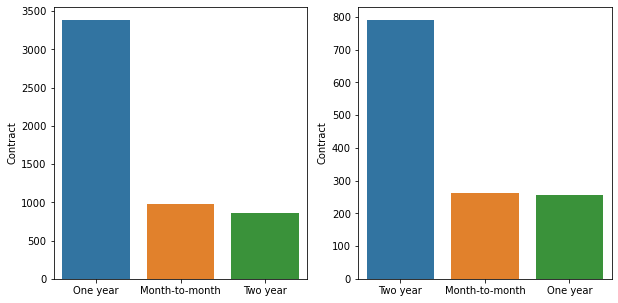

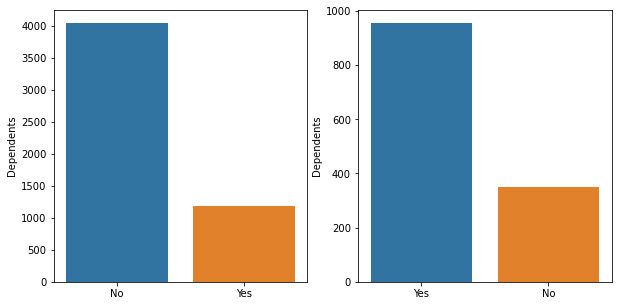

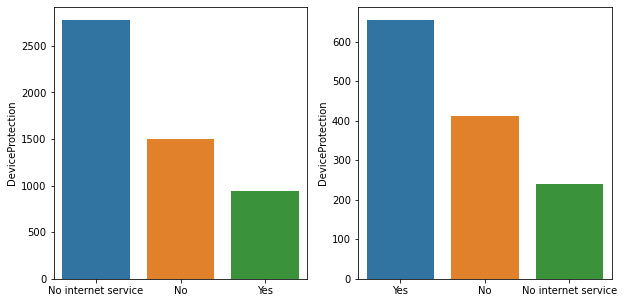

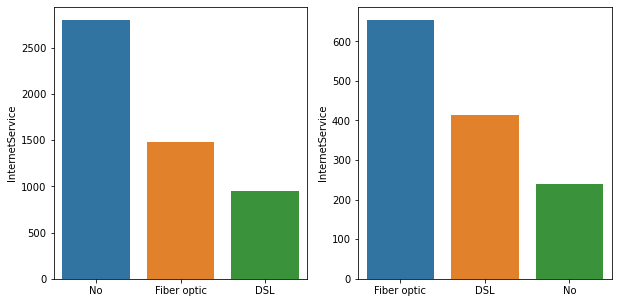

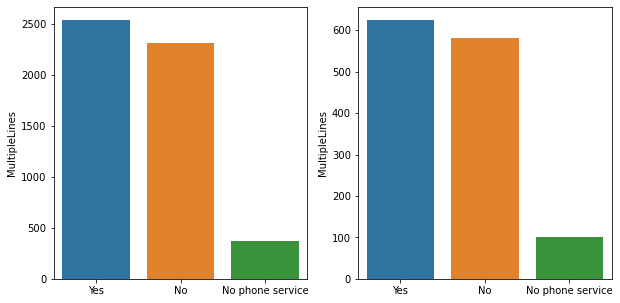

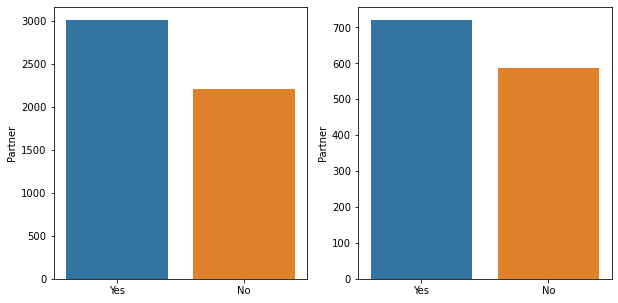

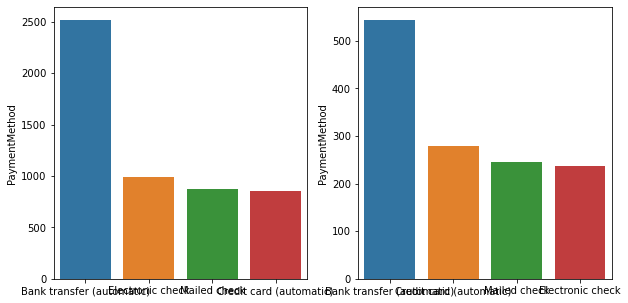

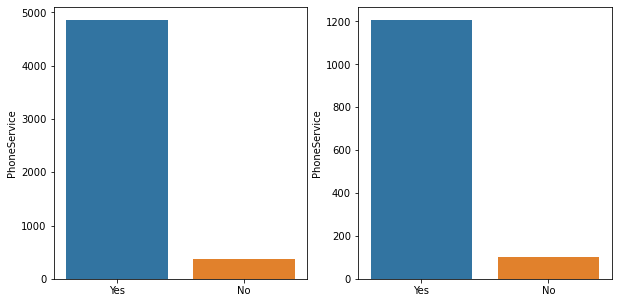

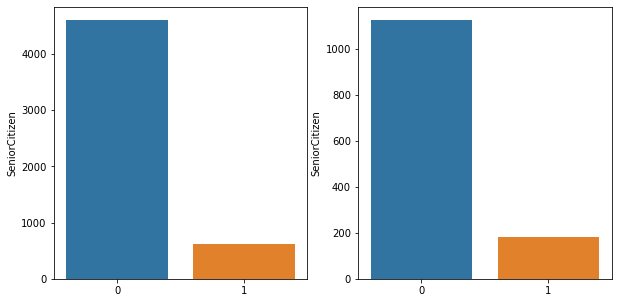

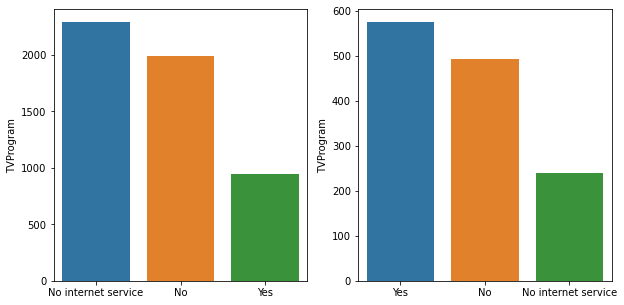

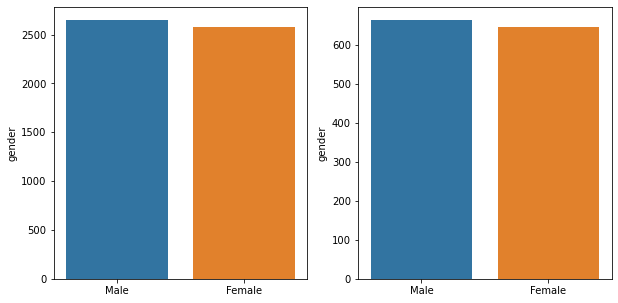

In [196]:
def feat_plot(feat):
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    sns.barplot(x = train[feat].unique(),y = train[feat].value_counts())
    
    plt.subplot(122)
    sns.barplot(x = test[feat].unique(),y = test[feat].value_counts())
feats = ['Contract','Dependents','DeviceProtection','InternetService','MultipleLines','Partner',
         'PaymentMethod','PhoneService','SeniorCitizen','TVProgram','gender']
for feat in feats:
    feat_plot(feat)

类别数据可视化，分析训练集与测试集的类别数据

In [197]:
#数据标准化
def data_stad(feat):
    #训练数据标准化
    mean_train = train[feat].mean()
    std_train = train[feat].std()
    train[feat] = (train[feat] - mean_train) / std_train
    
    #测试集数据标准化
    mean_test = test[feat].mean()
    std_test = test[feat].mean()
    test[feat] = (test[feat] - mean_test) / std_test

con_feats = ['MonthlyCharges','TotalCharges','tenure']
for feat in con_feats:
    data_stad(feat)

分别将训练数据和测试数据的连续型特征进行标准化

In [198]:
data = pd.concat([train,test])
print(train.shape,test.shape,data.shape)

(5227, 16) (1307, 15) (6534, 16)


然后将训练集和测试集进行合并，对合并数据的类别特征进行编码

In [199]:
mapping = {0:'No',1:'Yes'}
data['SeniorCitizen'] = data['SeniorCitizen'].map(mapping)

将类别型特征SeniorCitizen转为字符串，方便后续的one_hot编码

In [200]:
data.drop(['ID','Label'],axis = 1,inplace = True)

删除ID和Label

In [201]:
Y = train['Label']

将训练集的标签取出来，定义为y

In [202]:
dummy = pd.get_dummies(data)
dummy.shape

(6534, 32)

对类别数据进行编码

In [203]:
train1 = dummy.iloc[:train.shape[0],:]
test1 = dummy.iloc[train.shape[0]:,:]

再将合并的数据拆为训练集和测试集

In [204]:
X_train,X_test,Y_train,Y_test = train_test_split(train1,Y)

将训练集分为训练数据测试数据

# GBDT模型 使用XGBOOST

In [205]:
from xgboost import XGBClassifier

In [206]:
xgb = XGBClassifier()
# gbm = LGBMClassifier()

In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

对数据的标签进行再编码，将【no,yes】转化成【0,1】

In [208]:
xgb.fit(X_train,Y_train)
# gbm.fit(x_train,y_train)

pred_xgb = xgb.predict(X_test)
# pred_gbm= gbm.predict(x_test)

训练模型并预测

In [209]:
pred_xgb

array([0, 1, 0, ..., 1, 1, 1])

In [210]:
print(accuracy_score(Y_test,pred_xgb))
# print(accuracy_score(y_test,pred_gbm))

0.75592960979342


In [211]:
xgb.score(X_test, pred_xgb)

1.0

使用准确度accuracy_score来衡量模型

# 线性模型 使用逻辑回归

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [214]:
pred_lr = lr.predict(X_test)
pred_lr

array([0, 1, 0, ..., 1, 1, 1])

In [215]:
accuracy_score(Y_test,pred_lr)

0.7666411629686305

In [216]:
lr.score(X_test, pred_lr)

1.0

# 支持向量机

In [217]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc = svc.fit(X_train, y_train) 

训练模型

In [218]:
pred_svm = svc.predict(X_test)
pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

预测

In [219]:
accuracy_score(Y_test,pred_svm)

0.631981637337414

In [220]:
svc.score(X_test, pred_svm)

1.0

使用准确度accuracy_score来衡量模型

# K近邻模型 

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [223]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [224]:
pred_clf = clf.predict(X_test)
pred_clf

array([0, 1, 0, ..., 0, 0, 1])

In [225]:
accuracy_score(Y_test,pred_clf)

0.7214996174445295

In [226]:
clf.score(X_test, pred_clf)

1.0

# 随机森林

In [278]:
from sklearn.ensemble import RandomForestClassifier #随机森林在ensemble模块下，这里是分类器

In [283]:
rfc = RandomForestClassifier(n_estimators=30,random_state=5) #随机分类实例化
rfc = rfc.fit(X_train,Y_train)#模型训练

In [284]:
pred_rfc = rfc.predict(X_test)
pred_rfc

array([0, 1, 0, ..., 1, 0, 1])

In [285]:
accuracy_score(Y_test,pred_rfc)

0.7352716143840857

In [286]:
rfc.score(X_test, pred_rfc)

1.0

# 神经网络模型

In [232]:
from sklearn.neural_network import MLPClassifier

In [233]:
mlp=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,5))
mlp.fit(X_train,Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5), solver='lbfgs')

In [234]:
pred_mlp = mlp.predict(X_test)
pred_mlp

array([0, 1, 0, ..., 0, 1, 1])

In [235]:
accuracy_score(Y_test,pred_mlp)

0.764345830145371

In [236]:
mlp.score(X_test, pred_mlp)

1.0